In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data_processing/cleaned-data.csv')

In [3]:
import matplotlib.pyplot as plt

In [4]:
df.columns

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3',
       'improved'],
      dtype='object')

In [5]:
import seaborn as sns

# Visual Analysis
****

After viewing the distribution of final grades for each feature, using a swam plot, there were some trends that emerged and an interesting data story which we will discuss briefly as an aside to our main goal of grade predictions.

## Negative correlation
First we will look at features that show a decrease in final grades with an increase in the dependent variable.

Dependent Variable | Notes
------------------ | -----
Failures | There is a strong negative correlation between the number of previous failures and the final grade recorded in the course
Absences | Negative correlation, pearson correlation coefficient analysis **below**
Travel Time | Negative correlation
Workday Alcohol Consumption | Negative correlation
Weekend Alcohol Consumption | Negative correlation

In [6]:
import numpy as np

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

### Correlation Coefficients

The following pearson coefficients will statistically show the strength of the negative correlation between the variables showing a visual downward trend. From the subsequent plots it is easy to incorrectly deduce that workday alcohol consumption has a stronger influence than weekend alcohol consumption.

In [25]:
neg_corr_list = ['failures', 'absences', 'Walc', 'Dalc', 'traveltime']

for depend_var in neg_corr_list:
    r = pearson_r(df[depend_var].values, df.G3.values)

    # Print the result
    print("\n{} pearson correlation coefficient is: \n{:.2f}\n".format(depend_var.upper(), r))
    
    assert r < 0


FAILURES pearson correlation coefficient is: 
-0.29


ABSENCES pearson correlation coefficient is: 
-0.21


WALC pearson correlation coefficient is: 
-0.19


DALC pearson correlation coefficient is: 
-0.14


TRAVELTIME pearson correlation coefficient is: 
-0.10



### Negative collelation plots

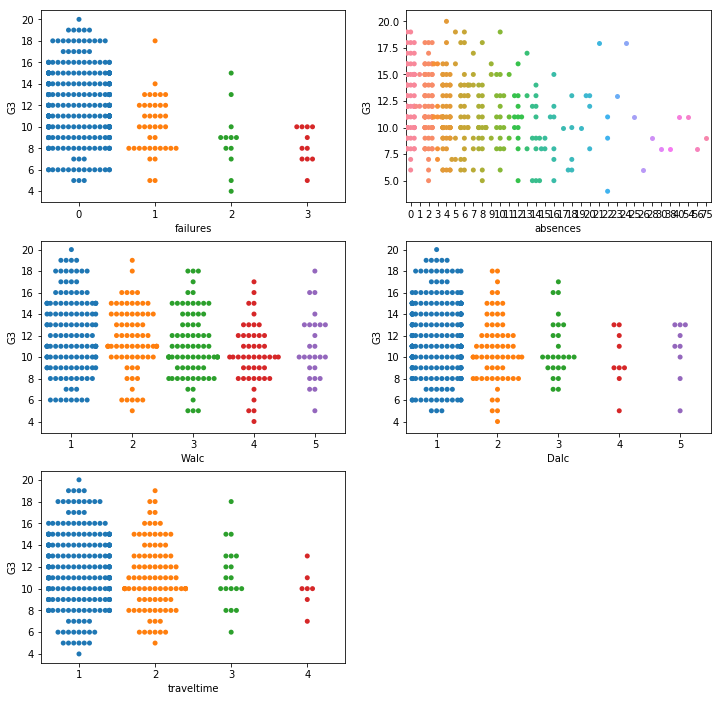

In [24]:
cols = ['failures', 'absences', 'Walc', 'Dalc', 'traveltime']

plt.figure(figsize=(12,12))
plot_number = 1
for column in cols:
    plt.subplot(3,2,plot_number)
    sns.swarmplot(x=column, y='G3', data=df)
    plot_number += 1

plt.show()

## Positive correlation variables

Study time, shows a positive correlation and has a person correlation coefficient of:

In [26]:
r = pearson_r(df.studytime.values, df.G3.values)

print("pearson correlation coefficient for STUDY TIME is: \n{:.2f}".format(r))

pearson correlation coefficient for STUDY TIME is: 
0.13


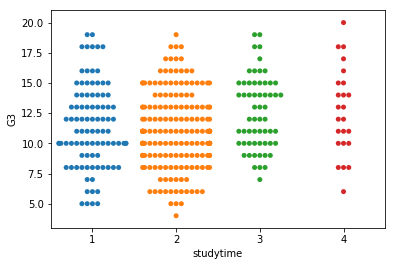

In [27]:
sns.swarmplot(x='studytime', y='G3', data=df)
plt.show()

## Other positive relationships

We will investigate some very interesting positive correlations in the story section of the analysis.

## Highly correlated variables

The final grade (G3) is accompanied in the dataset by two highly correlated features (G1, G2) which are the period one and period two grades that lead up to the final assessment. A third dependent variable was calculated based on the performance of the learner on their period one & two assessments. This additional dependent variable is labeled `improved` and is a binary representation of the learner improving their grade from period one to period two (`1`), or not(`0`).

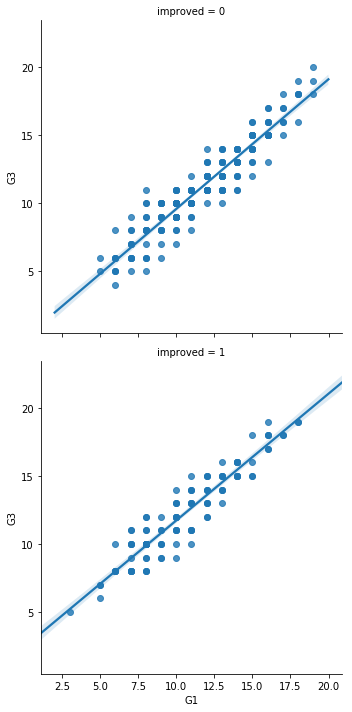

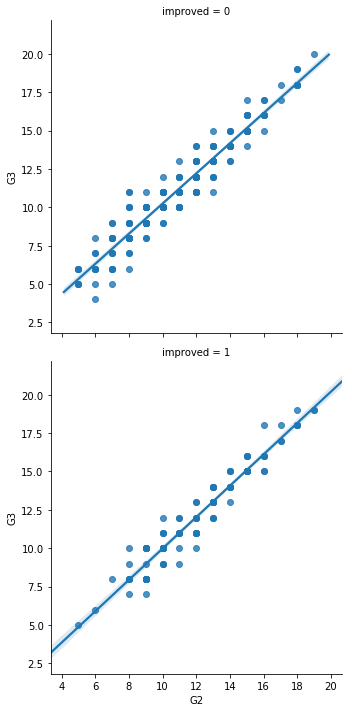

In [33]:
sns.lmplot(x='G1', y='G3', data=df, row='improved')

sns.lmplot(x='G2', y='G3', data=df, row='improved')
plt.show()

# An emergent data story

When we look at the binary variables it is obvious from the plot that there is a discrepency between male and female student averages:

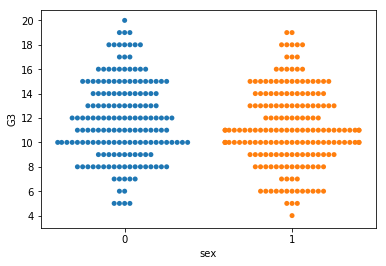

In [34]:
sns.swarmplot(x='sex', y='G3', data=df)
plt.show()

In [39]:
females = df[df['sex']==1]

print("The mean final grade for female students is {:.2f}".format(females.G3.mean()))

males = df[df['sex']==0]

print("\nThe mean final grade for male students is {:.2f}".format(males.G3.mean()))

The mean final grade for female students is 11.21

The mean final grade for male students is 11.87


When these young women grow up, get jobs, and have children of their own; we find that there are direct correlations between the education of the mothers (`Medu`) and their children's performance in school. We will also plot the father's education level (`Fedu`):

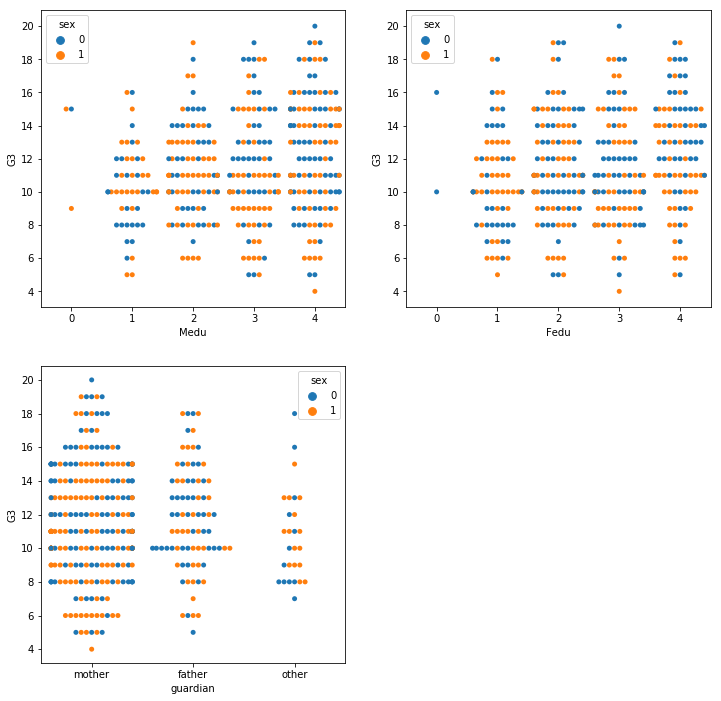

In [43]:
cols = ['Medu', 'Fedu', 'guardian']

plt.figure(figsize=(12,12))
plot_number = 1
for column in cols:
    plt.subplot(2,2,plot_number)
    sns.swarmplot(x=column, y='G3', data=df, hue='sex')
    plot_number += 1

plt.show()

## If you want to improve the final grades of both males and females, ensure that girls are performing as well or better than the boys and ensure women are successful in the workforce.

In [41]:
r = pearson_r(df.Medu.values, df.G3.values)

print("pearson correlation coefficient for MOTHER'S EDUCATION LEVEL is: \n{:.2f}".format(r))

pearson correlation coefficient for MOTHER'S EDUCATION LEVEL is: 
0.19


There is also some indication that having a mother in the workforce (`Mjob`) will have an effect on the performance of both males and females in school. (the father's occupation `Fjob` is also provided for comparison):

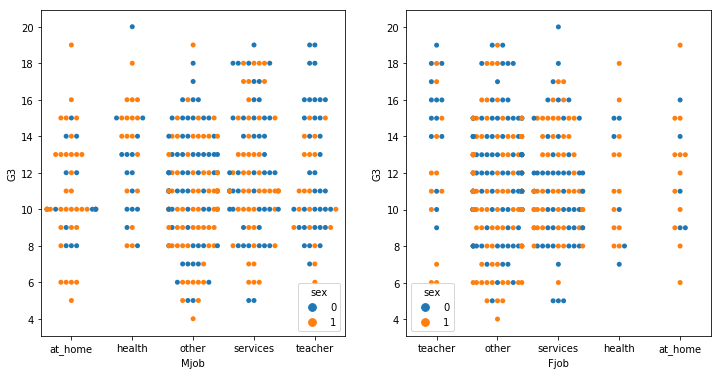

In [47]:
cols = ['Mjob', 'Fjob']

plt.figure(figsize=(12,6))
plot_number = 1
for column in cols:
    plt.subplot(1,2,plot_number)
    sns.swarmplot(x=column, y='G3', data=df, hue='sex')
    plot_number += 1

plt.show()